# Analyzing climate change effects on Madagascar

In this jupyter notebook, we aim to analyze the climate change effects on Madagascar through the following research questions:
- How have the significant climate trends in Madagascar affected the livelihood of the people in the country? This is including but not limited to: food security, population levels, and greenhouse gas emissions.


## Overview of datasets:
- First dataset (Climate change indicators): [https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar](https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar)
- Second dataset (Food security)- [https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd](https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd)
- Third dataset (Food security) - https://data.humdata.org/dataset/hrp-projects-mdg
- Fourth dataset (Environmental data) - https://data.humdata.org/dataset/world-bank-environment-indicators-for-madagascar

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_theme()

In [2]:
# Read in first dataset
climate_change_indicators = pd.read_csv("data/climate-change_mdg.csv")

climate_change_indicators["Year"] = climate_change_indicators["Year"].astype(int)
climate_change_indicators["Value"] = climate_change_indicators["Value"].astype(float)
climate_change_indicators.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Madagascar,MDG,2018,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
1,Madagascar,MDG,2017,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
2,Madagascar,MDG,2016,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
3,Madagascar,MDG,2015,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
4,Madagascar,MDG,2014,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0


In [3]:
# Read in the second dataset about food security
food_security = pd.read_csv("data/food_security/pblstatssum-2.csv")
food_security["Mean"] = food_security["Mean"].astype(float)
food_security.head()

,SvyDate,ADM0_NAME,ADM1_NAME,ADM2_NAME,AdminStrata,Variable,VariableDescription,Demographic,Mean
0,2016-05-01T00:00:00,Madagascar,NaN,NaN,Analamanga,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.15652
1,2016-05-01T00:00:00,Madagascar,NaN,NaN,Androy,BorrowOrHelp,# of days household using this coping strategy...,NaN,2.34211
2,2016-05-01T00:00:00,Madagascar,NaN,NaN,Anosy,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.75610
3,2016-05-01T00:00:00,Madagascar,NaN,NaN,Atsinanana,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.49296
4,2016-05-01T00:00:00,Madagascar,NaN,NaN,Analamanga,BorrowOrHelp>=1,prevalence-->equals to 1 if household uses thi...,NaN,0.44457


In [4]:
# Read in the third dataset
hrp_projects = pd.read_csv("data/hrp-projects.csv")
hrp_projects.head()

,name,versionCode,currentRequestedFunds,objective,partners,startDate,endDate,globalClusters,organizations,plans,Response plan code
0,#activity+name,#activity+code+v_hpc,#value+requested+usd,#description+objective,#org+impl+name+list,#date+start,#date+end,#sector+cluster+global+name,#org+prog+name,#response+plan+name,#response+plan+code
1,Support for the operational coordination of re...,FMDG22-CSS-183416-1,13333,Support for the operational coordination of re...,NaN,2022-01-01,2022-05-31,Coordination and support services,Office for the Coordination of Humanitarian Af...,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
2,Strengthening of the monitoring and early warn...,FMDG22-CSS-183417-1,41250,Strengthening of the monitoring and early warn...,NaN,2022-01-01,2022-05-31,Coordination and support services,International Organization for Migration,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
3,Provision of learning support provision to red...,FMDG22-EDU-183413-1,1712500,Provision of learning support to reduce the im...,NaN,2022-01-01,2022-05-31,Education,United Nations Children's Fund,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
4,"Emergency cash food assistance for 25,000 bene...",FMDG22-FSC-183390-1,541667,"Emergency cash food assistance for 25,000 bene...",NaN,2022-01-01,2022-05-31,Food Security,Save the Children,Madagascar's Grand Sud Flash Appeal 2022,FMDG22


In [5]:
# Read in the fourth dataset
environmental_data = pd.read_csv("data/environment_mdg.csv")
environmental_data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Madagascar,MDG,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
2,Madagascar,MDG,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
3,Madagascar,MDG,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
4,Madagascar,MDG,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321


In [6]:
# Read in the fifth dataset
temperature_data = pd.read_csv("data/Madagascar_Temp_Data.csv")
temperature_data["YEAR"] = temperature_data["YEAR"].astype(int)

# MAM is Spring (March, April, May), JJA is Summer, SON is Fall, DJF is Winter
# ANN is annual average
# Madagascar has different seasons: hot and rainy in Nov-April and cooler dry season May-Oct. 
temperature_data["hot_season"] = temperature_data[['NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR']].mean(axis = 1)
temperature_data["cool_season"] = temperature_data[['MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT']].mean(axis = 1)

temperature_data["ANN"] = (temperature_data["ANN"] * 9/5) + 32
# (x * 9/5) + 32 is Celcius to Farenheit conversion 

temperature_data.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,MAM,JJA,SON,DJF,ANN,hot_season,cool_season
114,2015,25.4,25.2,25.1,24.5,23.0,21.3,20.6,20.8,21.8,23.9,24.6,26.0,24.2,20.9,23.5,25.8,74.30,25.133333,21.900000
115,2016,25.7,25.8,25.9,24.7,21.8,20.3,19.8,20.9,21.9,23.5,24.4,25.7,24.1,20.3,23.3,25.8,74.12,25.366667,21.366667
116,2017,25.8,25.9,25.5,24.5,23.1,21.6,20.7,21.1,22.2,23.8,24.3,24.9,24.4,21.1,23.4,25.0,74.48,25.150000,22.083333
117,2018,24.9,25.1,25.2,24.2,23.0,21.3,20.1,21.4,22.5,23.1,24.5,25.7,24.1,20.9,23.4,25.5,74.12,24.933333,21.900000
118,2019,25.5,25.3,25.6,24.7,22.7,21.0,20.7,21.1,22.3,24.3,25.1,25.9,24.3,21.0,23.9,-999.0,74.66,25.350000,22.016667


# Other datasets and factors
From the links, [https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014](https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014) and [https://www.gbif.org/occurrence/search?country=MG](https://www.gbif.org/occurrence/search?country=MG), we can filter for different datasets based on Madagascar that we decide we want to use

# Analyzing the data

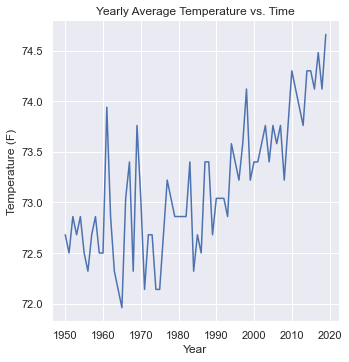

In [7]:
#Temperature change
temp = temperature_data[temperature_data["YEAR"] >= 1950] #after 1960, to match other datasets
graph = sns.relplot(data = temp, x = "YEAR", y = "ANN", kind = "line")
graph.set(ylabel="Temperature (F)", xlabel = "Year", title = "Yearly Average Temperature vs. Time")

In [17]:
#Temperature 2-sided T-Tesst: used to determine if there is a statistically significant temperature change
#Comparing the 1950s to 2010s

#T-test: hot seasons comparison
mask1 = (temperature_data['YEAR'] >= 1950) & (temperature_data['YEAR'] <= 1960)
mask2 = (temperature_data['YEAR'] >= 2009) & (temperature_data['YEAR'] <= 2019)

hot_data_50s = temperature_data["hot_season"][mask1]
hot_data_10s = temperature_data["hot_season"][mask2]
t_test_hot_data = stats.ttest_ind(hot_data_50s, hot_data_10s)[1]

#T-test: cool seasons comparision
cool_data_50s = temperature_data["cool_season"][mask1]
cool_data_10s = temperature_data["cool_season"][mask2]
t_test_cool_data = stats.ttest_ind(cool_data_50s, cool_data_10s)[1]

#T-test: Yearly comparison 
data_50s = temperature_data["ANN"][mask1]
data_10s = temperature_data["ANN"][mask2]

t_test_temp_data = stats.ttest_ind(data_50s, data_10s)[1]

print('Yearly temperature p-value', t_test_temp_data)
print('Hot season temperature p-value', t_test_hot_data)
print('Cool season temperature p-value', t_test_cool_data)

Yearly temperature p-value 1.6915201657211196e-12
Hot season temperature p-value 1.1640753028589236e-10
Cool season temperature p-value 8.228814442839968e-09


When looking at the results of a two-sided t-test from 1950-1960 and 2009-2019, the resulting p-values comparing the hot season, cool season, and yearly temperature averages are all far below 0.05. This value tells us that our null hypothesis of the temperature not changing over time has sufficient evidence to be rejected.

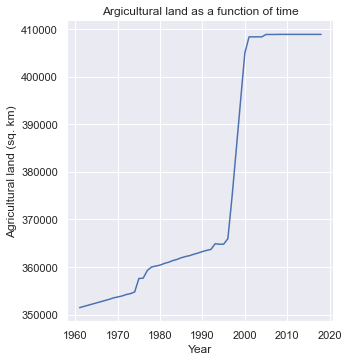

In [9]:
#Agricultural Land (Square Kilometers)
argi = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Agricultural land (sq. km)"]
graph = sns.relplot(data=argi, x="Year", y="Value", kind="line")
graph.set(ylabel="Agricultural land (sq. km)", title="Argicultural land as a function of time")

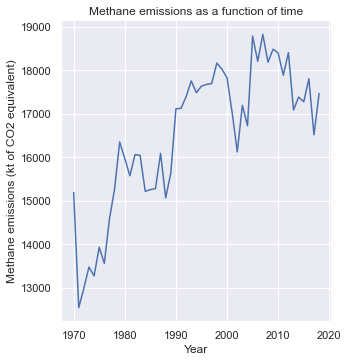

In [10]:
#Methane emissions (kt of CO2 equivalent)
methane_emission = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Methane emissions (kt of CO2 equivalent)"]
graph = sns.relplot(data=methane_emission, x="Year", y="Value", kind="line")
graph.set(ylabel="Methane emissions (kt of CO2 equivalent)", title="Methane emissions as a function of time")

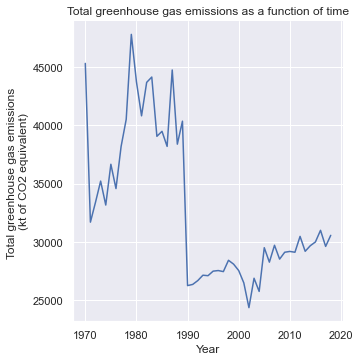

In [11]:
#Total greenhouse gas emissions (kt of CO2 equivalent)
greenhouse_gas = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Total greenhouse gas emissions (kt of CO2 equivalent)"]
graph = sns.relplot(data=greenhouse_gas, x="Year", y="Value", kind="line")
graph.set(ylabel="Total greenhouse gas emissions \n(kt of CO2 equivalent)", title="Total greenhouse gas emissions as a function of time")

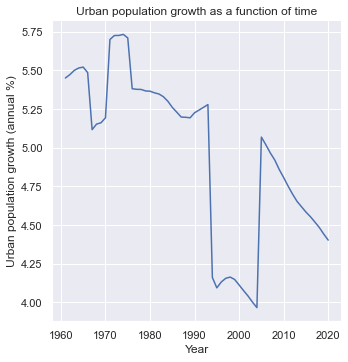

In [12]:
#Urban population growth
urb_pop = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Urban population growth (annual %)"]
graph = sns.relplot(data=urb_pop, x="Year", y="Value", kind="line")
graph.set(ylabel="Urban population growth (annual %)", title="Urban population growth as a function of time")

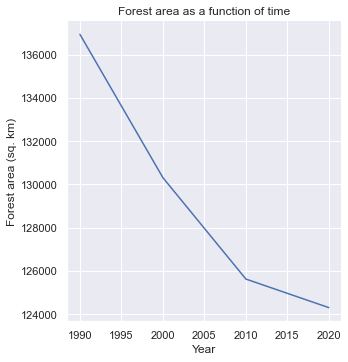

In [13]:
forest_area = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Forest area (sq. km)"]
graph = sns.relplot(data=forest_area, x="Year", y="Value", kind="line")
graph.set(ylabel="Forest area (sq. km)", title="Forest area as a function of time")

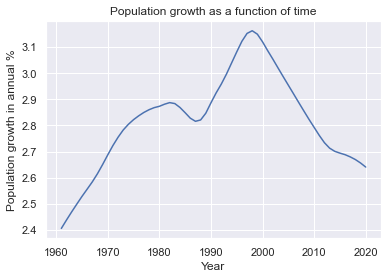

In [14]:
population_growth = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Population growth (annual %)"]

plt.plot(population_growth["Year"], population_growth["Value"])
plt.xlabel("Year")
plt.ylabel("Population growth in annual %")
plt.title("Population growth as a function of time")
plt.show()

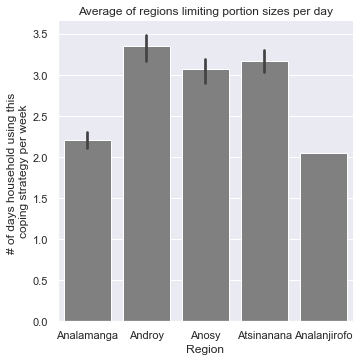

In [15]:
limited_portion_size = food_security[(food_security["Variable"]=="LimitPortionSize")]
graph = sns.catplot(x="AdminStrata", y="Mean", kind="bar", data=limited_portion_size, color="gray")
graph.set(ylabel="# of days household using this \ncoping strategy per week", xlabel="Region", title="Average of regions limiting portion sizes per day")

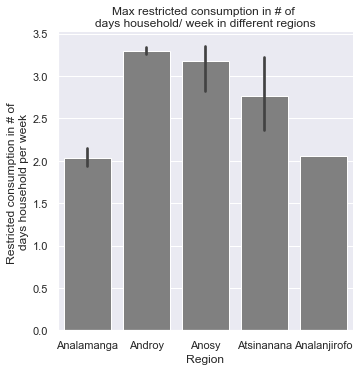

In [16]:
restrict_consumption = food_security[food_security["Variable"]=="RestrictConsumption"]

graph = sns.catplot(x="AdminStrata", y="Mean", kind="bar", data=restrict_consumption, color="gray")
graph.set(ylabel="Restricted consumption in # of \ndays household per week", xlabel="Region", title="Max restricted consumption in # of \ndays household/ week in different regions")